# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with simply "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix # Used to get your f1 with some work. This tells which is right and wrong for each class
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report # gives me my f1 score and other metrics

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [220]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False) 


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0])) #shape is the length of the first dimension
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

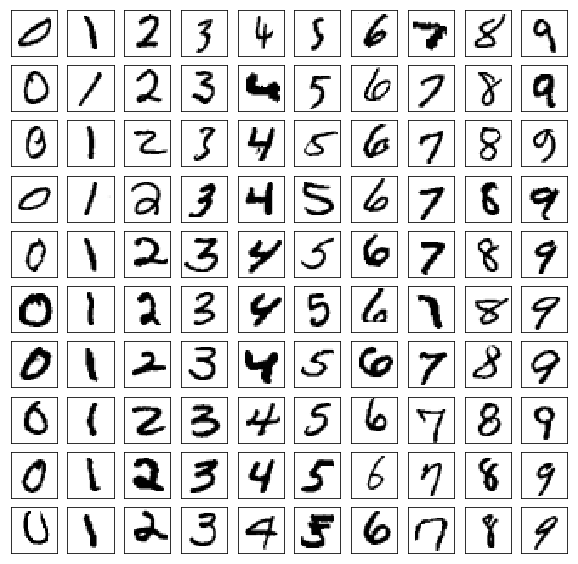

In [173]:
def P1(num_examples=10):

### STUDENT START ###    

# Define a dictionary to put all the images in the class they belong to .
    d = {} 
    
# Create a list to append images of numbers 0 through 9 until end of dataset.
    for i in range(10): 
        d[str(i)] = []
    for i in range(len(X)):
        d[Y[i]].append(X[i])
    
# Create the subplots and corresponding images into each plot.    
    plt.figure(figsize=(10,10))
    for i in range(num_examples):
        for j in range(10):
            plt.subplot(num_examples,10,i*10+j+1)
            plt.imshow(d[str(j)][i].reshape(28,28), cmap=plt.cm.binary)
            plt.xticks([])
            plt.yticks([])
            
            # plt.grid(False)
            # plt.style.use('grayscale')
            
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev (validation) set. For k=1, show precision, recall, and F1 (metrics) for each label. Which is the most difficult digit (the one with the lowest F1 score)?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [175]:
# Bryan go explain why F1 score is being used. Combo of accuracy and recall (compares both) 

def P2(k_values):

### STUDENT START ###
    
# For each k, run the knn classifier and predict the values of the mini train set.     
    for k in k_values:
        knn = KNeighborsClassifier(k)
        y_true = dev_labels
        knn.fit(mini_train_data, mini_train_labels)
        y_pred = knn.predict(dev_data)
# Create the reports and print out precision, recall, and F-1 Score for k=1        
        report = classification_report(y_true, y_pred, output_dict=True)
        if k==1:
            for i in range(10):
                i = str(i)
                print(i, "Precision = %.2f, Recall = %.2f, F-1 Score = %.2f" % (report[i]['precision'], report[i]['recall'], report[i]['f1-score']))
        
        print("Accuracy when k =", k, "is", report['accuracy'])
  
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

0 Precision = 0.92, Recall = 0.98, F-1 Score = 0.95
1 Precision = 0.87, Recall = 1.00, F-1 Score = 0.93
2 Precision = 0.96, Recall = 0.84, F-1 Score = 0.90
3 Precision = 0.81, Recall = 0.84, F-1 Score = 0.82
4 Precision = 0.87, Recall = 0.93, F-1 Score = 0.90
5 Precision = 0.84, Recall = 0.83, F-1 Score = 0.84
6 Precision = 0.94, Recall = 0.94, F-1 Score = 0.94
7 Precision = 0.84, Recall = 0.88, F-1 Score = 0.86
8 Precision = 0.87, Recall = 0.72, F-1 Score = 0.79
9 Precision = 0.84, Recall = 0.75, F-1 Score = 0.79
Accuracy when k = 1 is 0.876
Accuracy when k = 3 is 0.88
Accuracy when k = 5 is 0.884
Accuracy when k = 7 is 0.874
Accuracy when k = 9 is 0.865


ANSWER: Number 8 has the lowest F1 score and is the most difficult digit. The F1 score is the harmonic mean of both precision and recall and reaches the best value when closest to 1. Out of the digits, 8 has an F-1 Score of 0.79.
Note: Fetchopenml changes the order of the data each time it is run, so the f-1 score varies slightly. Digits 8 and 9 have the lowest F-1 score. 


(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [171]:
def P3(train_sizes, accuracies):

### STUDENT START ###

# Set the classifier to 1
    for i in train_sizes:
        knn = KNeighborsClassifier(1)
        y_true = dev_labels
        
        knn.fit(train_data[:i], train_labels[:i])
        
# Measure the time before and after prediction        
        start_time = time.time()
        y_pred = knn.predict(dev_data)
        end_time = time.time()
        print("Training set size", i, "has time of:", end_time-start_time)

# Adding the accuracies from classification report into the dictionary        
        accuracies.append(classification_report(y_true, y_pred, output_dict=True)['accuracy'])

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)
print("Accuracies in dictionary:", accuracies)

Training set size 100 has time of: 0.14162015914916992
Training set size 200 has time of: 0.27127552032470703
Training set size 400 has time of: 0.5625364780426025
Training set size 800 has time of: 1.1309831142425537
Training set size 1600 has time of: 2.2669384479522705
Training set size 3200 has time of: 4.981626749038696
Training set size 6400 has time of: 9.303118705749512
Training set size 12800 has time of: 18.91539216041565
Training set size 25000 has time of: 39.17026877403259
Accuracies in dictionary: [0.673, 0.763, 0.808, 0.856, 0.875, 0.915, 0.937, 0.954, 0.962]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Predicted accuracy for n = 60,000: [0.98381701]


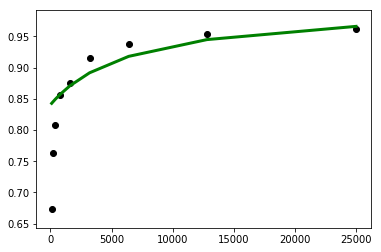

In [169]:
def P4():

## STUDENT START ###
    
    n = 60000
    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

    train_sizes = np.array(train_sizes).reshape(-1, 1)
    values = np.array(accuracies)
    
# Use the odds ratio to capture values from 1 to infinity. Then take the inverse function 
# to get back an accuracy between 0 and 1.
    regression = LinearRegression().fit(train_sizes, values/(1-values))
    prediction = (regression.predict([[n]]))
    
# Invert the function to get the predicted value back in 0 and 1 range
    v = prediction / (1 + prediction)
    print('Predicted accuracy for n = 60,000:', v)
# Plot the training sizes and their actual accuracies
    plt.scatter(train_sizes, values,  color='black')
    
    accuracy_pred = regression.predict(train_sizes)
    pred_training = accuracy_pred / (1 + accuracy_pred)
# Predict the accuracy based on training sizes and visualize predictions on the line
    plt.plot(train_sizes, pred_training, color='green', linewidth=3)
    
    
    
    
## STUDENT END ###

P4()



#### ANSWER: The issue with this regression is that it predicts an accuracy value greater than 1, which is not possible. You can transform the data using the odds ratio. This allows you to use larger training sets for which you can revert your transformed value to an estimated accuracy between 0 and 1. You can use this transformation to look at sample sizes greater than 60,000. 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 98   0   1   0   0   1   1   0   0   0]
 [  0 111   0   0   0   0   1   1   0   0]
 [  2   5  86   4   1   0   1   7   1   0]
 [  0   1   2  79   0   6   0   0   5   2]
 [  0   2   0   0  65   0   0   3   0  10]
 [  3   1   0   4   0  79   2   0   1   6]
 [  1   0   1   0   0   1  85   0   1   0]
 [  0   5   0   1   2   0   0  99   0   4]
 [  0   2   0   4   0   4   2   1  97   8]
 [  0   1   0   0   6   1   0   8   0  74]]


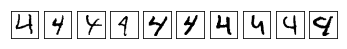

In [244]:
def P5():

## STUDENT START ###
    dev_data, dev_labels = X[60000:61000], Y[60000:61000]

    knn = KNeighborsClassifier(1)
    knn.fit(mini_train_data, mini_train_labels)
    y_pred = knn.predict(dev_data)
    print(confusion_matrix(dev_labels, y_pred))
    

    # pd.crosstab(dev_labels, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    # print(type(y_pred))
# See that the most confused pair of digits is 4 (actual), 9 (predicted) and
# print out a few examples. 
    i = 1
    plt.figure(figsize=(10,3))

    confuse = confusion_matrix(dev_labels,y_pred)
    max_element = 0
    i_max = 0
    j_max = 0
    for i in range(10):
        confuse[i][i]=0
    index = np.argmax(confuse)
    a, b = index//10, index%10
     
    j = 1
    plt.figure(figsize=(10,3))
    for i in range(len(y_pred)):  

        if y_pred[i] == str(b) and dev_labels[i] == str(a):

            plt.subplot(1, 17, j)
            plt.imshow(dev_data[i].reshape(28,28), cmap=plt.cm.binary)
            j+=1
            plt.xticks([])
            plt.yticks([])
    
## STUDENT END ###

P5()


ANSWER: Digit 4 often gets confused as a 9 by the model.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

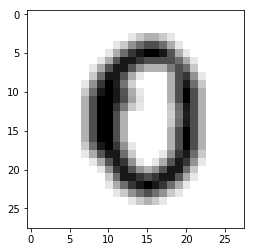

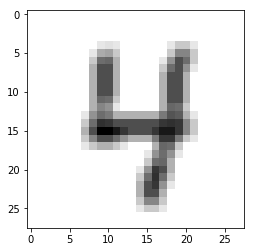

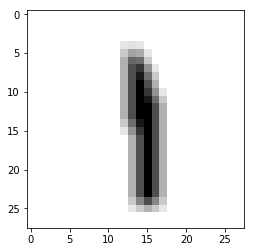

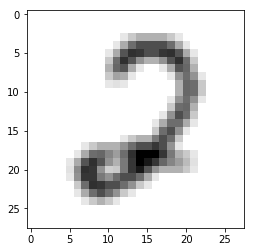

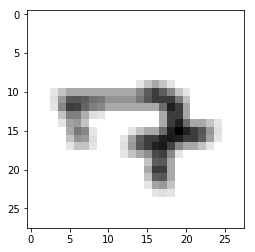

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       106
           1       0.90      0.98      0.94       118
           2       0.95      0.77      0.85       106
           3       0.86      0.95      0.90        97
           4       0.89      0.87      0.88        92
           5       0.96      0.86      0.91        88
           6       0.93      0.93      0.93       102
           7       0.84      0.93      0.88       102
           8       0.88      0.82      0.85        94
           9       0.85      0.87      0.86        95

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       106
           1       0.55      0.99      0.71       118
           2       0.94      0.64      0.76       106
           3       0.90 

In [159]:
def P6():
    
### STUDENT START ###

# Reshapes all vectors inside the training data to 28 by 28

    def reshape(vector):
        return vector.reshape(-1, 28,28) 


# Gets a list of coordinates surrounding any one coordinate that you enter.
# This function assumes that the max matrix size is 28 by 28 and you can enter 
# any permuation of coordinates from (0,0) to (28, 28). If there aren't 8 surrounding
# the pixel, then it plugs in 'None', which is needed for multiply with gaussian later.

    def neighbor_coordinates(a, b):
        list_of_coordinates = []    
        ROW = 28
        COLUMN = 28
        for x in range(a-1, a+2):
            for y in range(b-1, b+2):
                if (-1 < a < ROW and 
                    -1 < b < COLUMN and
                    (0 <= x < ROW) and
                    (0 <= y < COLUMN)):
                        list_of_coordinates.append([x, y])
                else:
                    list_of_coordinates.append(None)
        return list_of_coordinates
    

# Neighbor_values function gets the value of the coordinates that are in its vicinity
    def neighbor_values(matrix, x, y):
        values = [0 if A is None else matrix[A[0], A[1]] for A in neighbor_coordinates(x,y)]
        return(np.array(values))
    

# Creating gaussian matrix (take distance measurements 1 and root 2 since those are the only possible distances)
# Assume variance = 1.5 (can change for better accuracy)
    sig = 1.5
    def f(x, y):
        return np.exp(-(x**2 + y**2) / (2 * np.power(sig, 2.))) # 1/((np.sqrt(2*np.pi))*sig)) is not needed (normalize by 9 surrounding weights)
    gaussian = np.array([[f(x,y) for x in [-1,0,1]] for y in [-1,0,1]])
    
# Normalized 2D Gaussian function equation by the sum of the surrounding pixels.
    gaussian = gaussian / gaussian.sum() 
    gaussian = gaussian.reshape(9)
    

# Calculate the sum of the surrounding neighbors and the point itself.

    def weighted_sum(matrix, x, y):  
        return (neighbor_values(matrix, x, y)*gaussian).sum() 

# Returns the new matrix back after applying weights and summing the previous values

    def weighted_matrix(sample):

        # New matrix is created with 0s
        New_Matrix = np.zeros(shape = (len(sample), 28,28)) 
        
        square_matrix = reshape(sample)
        for entities in range(len(square_matrix)): # usually try to avoid for loops by using numpy functions 
            for a in range(28):
                for b in range(28):
                    new_number = weighted_sum(square_matrix[entities], a, b)
                    New_Matrix[entities][a][b] = new_number
        New_Matrix = New_Matrix.reshape(-1, 784)
        return New_Matrix

# Look at the gaussian blur on 5 images in mini train dataset just to check
    a = weighted_matrix(mini_train_data[:5])
    for im in a:
        plt.imshow(im.reshape(28,28), cmap=plt.cm.binary)
        plt.show()
        
# Choose n_neighbors to be 5, since the previous question showed that it had the highest accuracy    
# Preprocess the training data but not the dev data    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(weighted_matrix(mini_train_data), mini_train_labels)
    dev_pred = knn.predict(dev_data)
    print(classification_report(dev_labels, dev_pred))

# Preprocess the dev data, but not the training
    knn2 = KNeighborsClassifier(n_neighbors=5)
    knn2.fit(mini_train_data, mini_train_labels)
    dev_pred = knn2.predict(weighted_matrix(dev_data))
    print(classification_report(dev_labels, dev_pred))

# Preprocess both the training and dev data
    dev_pred = knn.predict(weighted_matrix(dev_data))
    print(classification_report(dev_labels, dev_pred))    

### STUDENT END ###

P6()

ANSWER: I hypothesized that preprocessing both the training set and the development set would lead to the highest accuracy since blurring both of them would reduce noise and extra detail. For variance (sigma squared) below one, we see a reduced accuracy in blurring in (2) dev data and (3) train and dev data when compared to blurring the training data. A variance of 1.5 blurred the images more and gave accuracy of 90% when training (1) train data and (3) train and dev data. Blurring on just the (2) dev data gave 82% accuracy.  This makes sense, since a higher variance reduces the contrast and makes the image more generalisable. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       106
           1       0.99      0.70      0.82       118
           2       0.71      0.84      0.77       106
           3       0.72      0.73      0.72        97
           4       0.85      0.73      0.78        92
           5       0.89      0.53      0.67        88
           6       0.94      0.86      0.90       102
           7       1.00      0.79      0.89       102
           8       0.50      0.88      0.64        94
           9       0.76      0.81      0.79        95

    accuracy                           0.79      1000
   macro avg       0.82      0.78      0.79      1000
weighted avg       0.83      0.79      0.79      1000

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       106
           1       0.87      0.87      0.87       118
           2       0.78      0.73      0.75       106
           3       0.75 

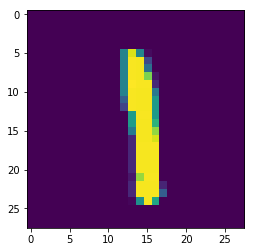

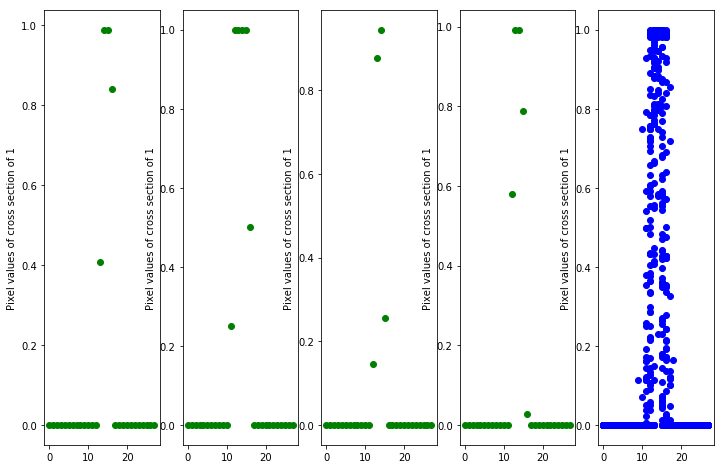

In [57]:
def P7():

## STUDENT START ###

# I took the number 1 to see if there was difference in the pixel value in a cross section of the '1'.
# Since 1 is just a straight line down, I hypothesized that there's little variance in the value of the pixel
# that changes the prediction of the NB Classifier.

# Plotted one image of 1 to visualize pixels
    mini_train_data_B = mini_train_data.copy()
    index_1 = np.where(Y=='1')
    plt.imshow(X[index_1[0][0],:].reshape(28,28))
    plt.figure(figsize=(12,8))

# Picked the cross section of the image (row 15) and printed out the pixel values
# to see if there is a difference in black / gray / white pixels. 
    row = 15
    a = 1
    for i in range(len(index_1[0][:5])):
        plt.subplot(1,5,a)
        z = X[index_1[0][i], 28*row:28*(row+1)]
        plt.ylabel("Pixel values of cross section of 1")
        plt.plot(z, "og")
        a+=1
            
# Aggregated the pixel values for 100 images to see if there is a difference when stacked in the blue plot.
# The values are scattered between 0 and 1
# and this doesn't seem to change if I look at individual images of '1'.
    for i in index_1[:100]:
        for a in range(100):
            z = X[i[a], 28*row:28*(row+1)]
            plt.plot(z, "ob")
        

# NB Model on pre-processed data
# Preprocessing features by labelling those <= 0.7 as 0 and features greater than 0.8 as 1.
# Out of the 5 images I looked at, all had pixels values greater than 0.7 which governed the shape of the 1.
    mini_train_data_B[mini_train_data_B <= 0.7] = 0
    mini_train_data_B[mini_train_data_B > 0.7] = 1
    model = BernoulliNB()
    model.fit(mini_train_data_B, mini_train_labels)
    y_pred = model.predict(dev_data)
    y_true = dev_labels
    report = classification_report(y_true, y_pred, output_dict=False)
    print(report)
    
# NB Model on white, grey, and black pixels. 
# Checked thresholds from an split (0.7, 0.2) before deciding on an even split into thirds.
    mini_train_data_B2 = mini_train_data.copy()
    mini_train_data_B2[mini_train_data_B2 <= 0.33] = 0
    mini_train_data_B2[mini_train_data_B2 > 0.66] = 2
    mini_train_data_B2[mini_train_data_B2 > 0] = 1
    model2 = MultinomialNB()
    model2.fit(mini_train_data_B2, mini_train_labels)
    y_pred = model2.predict(dev_data)
    y_true = dev_labels
    report = classification_report(y_true, y_pred, output_dict=False)
    print(report)
    

    
## STUDENT END ###

P7()

ANSWER: The multi-class version improved results only incrementally as seen by the F1 score in the classification report. After separating dark and white pixels into 0 and 1, there is litte improvement from separating them into an extra shade of grey. I tested this on several cross sections of the image of  number 1 since most individuals write the shape of 1 (straight line) unambiguously. Most 1's had a couple pixel values between 0 and 1.0, but almost all of the 1s had pixel values close to 1.0 (the middle pixels composing 1). When looking at the blue graphs with 100 images mapped on top of each other, there are varying shades of 'gray' being written in every image. I used a threshold of 0.7 to separate colored pixels and non-colored pixels to get an average f1 score of .79. Adding grey only gives a slightly better f1 score. It seems like the model prioritizes a fit on the shape of the image rather than the shades of darkness indicated by the pixel. Once the pixels have been partitioned 0 and 1, there is little benefit in adding a label for gray. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [107]:
def P8(alphas):

## STUDENT START ###

# Searching for the best alpha for the Bernoulli Model
    BNmodel = BernoulliNB()
    model_cv = GridSearchCV(BNmodel, alphas, cv = 5, scoring = 'accuracy')
    return model_cv.fit(mini_train_data, mini_train_labels)

## STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\bkauy\Anaconda3\lib\s

In [106]:
print('GridSearch best alpha is:', nb.best_params_)
print('GridSearch best score is:', nb.best_score_)
print(sorted(nb.cv_results_.keys()))
print(nb.cv_results_['mean_test_score'])

BNmodel = BernoulliNB(alpha = 0)
BNmodel.fit(mini_train_data, mini_train_labels)
y_pred = BNmodel.predict(mini_train_data)
report = (classification_report(mini_train_labels, y_pred, output_dict=True))
print(report['accuracy'])

GridSearch best alpha is: {'alpha': 0.001}
GridSearch best score is: 0.828
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_alpha', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
[0.817 0.827 0.828 0.822 0.817 0.813 0.812 0.813 0.79 ]
0.875


C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


ANSWER: The best value for alpha is 0.001.  
The accuracy when alpha is 0 is 0.817 when assuming cross validation is set to 5. 
It makes sense that an alpha of 0 (no smoothing) has lower accuracy since additional smoothing can increase the accuracy of the image.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [136]:
def P9():

## STUDENT START ###

# Adjusting smoothing to find an accuracy close to the BernoulliNB. 
    clf = GaussianNB()
    clf.fit(mini_train_data, mini_train_labels)
    y_pred = clf.predict(dev_data)
    y_true = dev_labels
    report = classification_report(y_true, y_pred, output_dict=False)
    print(report) 
    print(clf.theta_[1][0], clf.sigma_[1][0])

# Use a GridSearch to see whic smoothing value may increase the accuracy 
    model = GaussianNB()
    model_cv = GridSearchCV(model, var_smoothing, scoring = 'accuracy')
    result = model_cv.fit(mini_train_data, mini_train_labels)
    print('GridSearch best smoothing is:', result.best_params_)
    
    
# Create a new report setting var_smoothing to optimal value returned by the GridSearch    
    new = GaussianNB(var_smoothing=.1)
    
    new.fit(mini_train_data, mini_train_labels)
    y_pred = new.predict(dev_data)
    y_true = dev_labels
    report = classification_report(y_true, y_pred, output_dict=False)
    print(report)
    print(new.theta_[1][0], new.sigma_[1][0])

    
# List of possible values for smoothing
var_smoothing = {'var_smoothing': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}


## STUDENT END ###

gnb = P9()

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       106
           1       0.87      0.81      0.84       118
           2       0.59      0.44      0.51       106
           3       0.64      0.29      0.40        97
           4       0.78      0.32      0.45        92
           5       0.30      0.67      0.41        88
           6       0.74      0.85      0.79       102
           7       0.92      0.57      0.70       102
           8       0.38      0.11      0.17        94
           9       0.43      0.91      0.58        95

    accuracy                           0.59      1000
   macro avg       0.64      0.58      0.57      1000
weighted avg       0.65      0.59      0.58      1000

0.0 2.0143330705113426e-10


C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:43

GridSearch best smoothing is: {'var_smoothing': 0.1}
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       106
           1       0.82      0.96      0.89       118
           2       0.86      0.68      0.76       106
           3       0.82      0.77      0.79        97
           4       0.79      0.73      0.76        92
           5       0.81      0.73      0.77        88
           6       0.88      0.89      0.88       102
           7       0.99      0.86      0.92       102
           8       0.65      0.70      0.68        94
           9       0.67      0.87      0.76        95

    accuracy                           0.82      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.83      0.82      0.82      1000

0.0 0.020143330705113427


C:\Users\bkauy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ANSWER: Theta and Sigma stand for the mean and the variance of each feature of each class. Without any smoothing, the GaussianNB model returns an accuracy score of .59. By adding a smoothing factor of 0.1, the accuracy increases to 0.82. The mean of each feature of each class does not change, but the variance increases. You can see this difference in the data selected: Mean = did not change, variance went from 2e-10 to 2e-2. This result makes sense since a higher variance means less correlation between features, which indicates better estimation for the conditionally independent Naive Bayes model. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

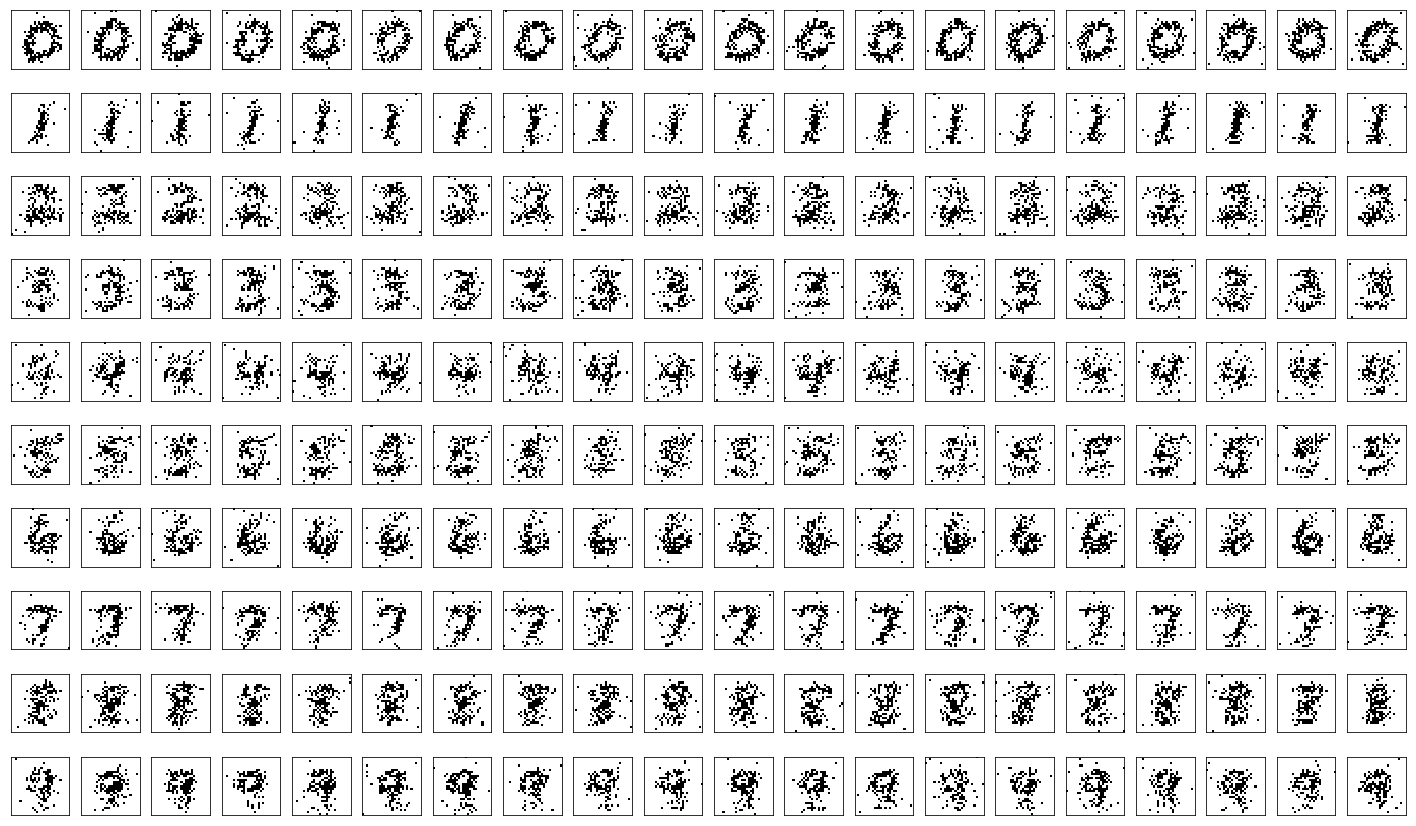

In [146]:
def P10(num_examples):

## STUDENT START ###

# Changing pixels to 0 or 1 based on the Bernoulli and then train the model

    model = BernoulliNB()
    mini_train_data[mini_train_data <= 0.5] = 0
    mini_train_data[mini_train_data > 0.5] = 1
    model.fit(mini_train_data, mini_train_labels)
    
# If the probability of the pixel features for specific class is 
# greater than the probability generated by random number, return boolean 0 or 1
    def generator(j):
        return np.random.rand(784) < np.exp(model.feature_log_prob_[j])

# Plot the subplots created by the generator function in format 10 by (x copies of number)
    plt.figure(figsize=(25,15))
    a = 1

# Generate grid 10x20    
    for j in range(10): 
        for i in range(num_examples):
            plt.subplot(10, 20, a)
            plt.imshow(generator(j).reshape(28,28), cmap=plt.cm.binary)
            a+=1
            plt.xticks([])
            plt.yticks([])
    # print(model.feature_log_prob_)
## STUDENT END ###

P10(20)

ANSWER: The Bernoulli model images are much more spotty than the training images. Each pixel is generated independently because of Naive Bayes (conditional independence). The probability that one pixel is black doesn't change the probability that the other pixel is black or white. They are independent to each other. If you used a smarter model that captured conditional dependency, there would be a more continuous shape. There is a risk for the pixels to be all white or all black but this probability is very low. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [165]:
def P11(buckets, correct, total):
    
## STUDENT START ###

# Fitting Bernoulli model on mini train data and printing out the classification report for comparison
    model = BernoulliNB(alpha = 0.001)
    model.fit(mini_train_data, mini_train_labels)
    
    pred_y = model.predict(mini_train_data)
    # print(classification_report(pred_y, mini_train_labels))
    
# Get the posterior probabilities of 0 to 9 for all mini train data 
    for i in range(len(mini_train_data)):
        posterior = model.predict_proba(mini_train_data[i].reshape(1,784)) # posterior probability
        # print(posterior)
        a = 0
        
        for g, value in enumerate(buckets):
            
# If the max posterior is less than the bucket value and matches the label, add it to correct bucket
# Increase total counter each time a comparison is made.
            if np.max(posterior) <= value:
                total[g] += 1
                correct[g] += model.predict(mini_train_data[i].reshape(1,784))[0] == mini_train_labels[i]
                #print(model.predict(mini_train_data[i].reshape(1,784))[0], )
                # print(np.argmax(posterior), mini_train_labels[g])
                break
                

                
## STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)
# print(correct)
for i in range(len(buckets)):
   accuracy = 0.0
   if (total[i] > 0): accuracy = correct[i] / total[i]
   print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   1    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  40    accuracy = 0.275
p(pred) <= 0.9990000000000    total =  65    accuracy = 0.554
p(pred) <= 0.9999900000000    total =  62    accuracy = 0.548
p(pred) <= 0.9999999000000    total =  59    accuracy = 0.797
p(pred) <= 0.9999999990000    total =  66    accuracy = 0.833
p(pred) <= 0.9999999999900    total =  64    accuracy = 0.938
p(pred) <= 0.9999999999999    total =  52    accuracy = 0.962
p(pred) <= 1.0000000000000    total = 591    accuracy = 0.990


ANSWER: The calibration for the Naive Bayes model is weak because the accuracies for each bucket are lower than the posterior probability. The posterior probability is an overestimation (poor model prediction). The model is predicting a higher accuracy than the actual accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [245]:
def P12():
# All pixels now are independent, but we can create our own features for dependency to make a better model.
# Did not finish :( 

## STUDENT START ###
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit((mini_train_data), mini_train_labels)
    dev_pred = knn.predict(dev_data)
    print(classification_report(dev_labels, dev_pred))
    
    
    for im in mini_train_data[0]:
#         for pixel in im:
            print(np.sum(im))
                
    print(mini_train_data[1])

## STUDENT END ###

P12()

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       101
           1       0.78      0.99      0.88       113
           2       0.97      0.80      0.88       107
           3       0.84      0.86      0.85        95
           4       0.94      0.79      0.86        80
           5       0.88      0.80      0.84        96
           6       0.93      0.96      0.94        89
           7       0.81      0.90      0.85       111
           8       1.00      0.81      0.89       118
           9       0.80      0.87      0.83        90

    accuracy                           0.88      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0